<a href="https://colab.research.google.com/github/endubi/Week-4-IP/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2021_11_Emmanuel_Ndubi_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BLUE CAR RESEARCH

In [2]:
### Week 4 IP
# Importing the key libraries for the project
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
% matplotlib inline 

In [4]:
# Loading the dataset
taxi = pd.read_csv("/content/Autolib_data.csv")
# Previewing the dataset
taxi.head(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [5]:
# Getting to know the shape of the data
# From the results we can see that our dataframe has 25 columns and 5000 rows.
taxi.shape

(5000, 25)

In [6]:
# Getting more information about the data
# we notice the date and time variables are in integer format.
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [7]:
# Count the number of non - missing values in the dataset
# From the results we can see that 'Diplayed comment' column has 111 rows 
# and 'Scheduled at" has 47 rows instead of 5000 rows. 
taxi.count()


Address                5000
Cars                   5000
Bluecar counter        5000
Utilib counter         5000
Utilib 1.4 counter     5000
Charge Slots           5000
Charging Status        5000
City                   5000
Displayed comment       111
ID                     5000
Kind                   5000
Geo point              5000
Postal code            5000
Public name            5000
Rental status          5000
Scheduled at             47
Slots                  5000
Station type           5000
Status                 5000
Subscription status    5000
year                   5000
month                  5000
day                    5000
hour                   5000
minute                 5000
dtype: int64

In [8]:
# Investigating the 'Displayed comment' columns
# It seems that this column has street addresses
taxi['Displayed comment'].value_counts()

Station en parking (niv -2), accÃ¨s 4 av. Foch                  8
Station en parking (niv 0), accÃ¨s 26 villa Croix Nivert        7
Station en parking (niv -2), accÃ¨s 125 bvd du Montparnasse     6
Station en parking (niv -1), accÃ¨s Place Georges Pompidou      6
Station en parking (niv -1), accÃ¨s 26 bvd Gouvion Saint-Cyr    6
Station en parking (niv -3), accÃ¨s 32 rue dâAlsace           6
Station en parking (niv -1), accÃ¨s 37 rue Leblanc              6
Station en parking                                              5
Station en parking (niv -2), accÃ¨s 2 avenue Gabriel            5
Station en parking (niv -1), accÃ¨s av. de Versailles           5
Borne d'abonnement en sous-sol (niv -1), accÃ¨s 4 rue Lobau     5
Station en parking (niv -1), accÃ¨s 4 av. des Ternes            5
Station en parking (niv -1), accÃ¨s rue Abel Gance              4
Station en parking (niv -1), accÃ¨s 37 rue Wilson               4
Station en parking (niv -1), accÃ¨s rue Wilson                  4
Station en

In [9]:
# Investigating the 'Scheduled at' columns
# This column seems to have scheduled times for the cabs.
taxi['Scheduled at'].value_counts()

2016-07-27T15:32:21    10
2016-07-05T13:10:09     8
2016-01-06T10:35:38     7
2016-04-26T14:28:01     6
2015-09-29T13:58:29     6
2018-01-03T10:52:00     4
2016-07-27T15:32:22     3
2012-09-17T08:57:28     3
Name: Scheduled at, dtype: int64

Data Exploration and Cleaning

In [10]:
# In this section we are going to identify the key variables which would be used for analysis
# From the research question, we need to investigate the lease of bluecars in Paris during
# the month of April. Once we are sure our data fits these parameters we can answer subsequent
# questions.

# Checking for City
# From the results we have other cities, we need to clean our city to ensure only its only Paris.
taxi['City'].value_counts()

Paris                    2816
Nanterre                  127
Issy-les-Moulineaux       101
Rueil-Malmaison            88
CrÃ©teil                   88
                         ... 
Saclay                      4
Le PrÃ©-Saint-Gervais       4
Clichy la garenne           3
Saint-Maur                  2
Epinay-sur-Seine            1
Name: City, Length: 88, dtype: int64

In [11]:
# Checking for year
# The year is 2018 which is ok.
taxi['year'].value_counts()

2018    5000
Name: year, dtype: int64

In [12]:
# Checking for month
# The month is only April which is inline with what we want to study.
taxi['month'].value_counts()

4    5000
Name: month, dtype: int64

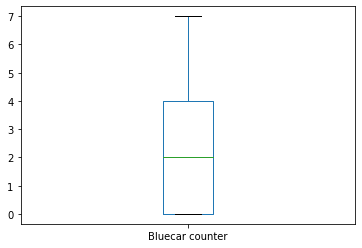

In [13]:
# Checking for Outliers
# From the boxplot the column blue car counter looks legit and no presence of outliers
taxi.boxplot(column =['Bluecar counter'], grid = False) 

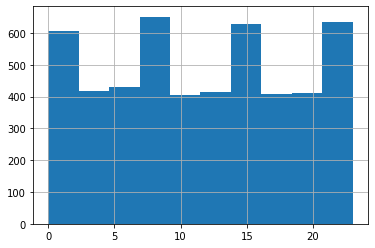

In [53]:
# Checking for Outliers by hour,
# From the histogram, there does not seem to be any outlier
# A quick glance tells us the most popular time is around midnight (00:00), 
# morning hours (5-10hrs), afternoon (around 3pm) and evening (21hrs)
# as the most active times.
taxi.hour.hist()

In [14]:
# Checking for missing values within the dataframe
# From the results here, it seems all the columns are complete except the two columns 
# (Displayed comment) and (Scheduled at) which we will not use in the study.
taxi.isnull().sum()

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

In [19]:
# Dropping the two columns
#taxi.drop(['Displayed comment', 'Scheduled at'],axis=1)
taxi_draft = taxi.drop(columns =['Displayed comment', 'Scheduled at'])
taxi_draft.head(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23


In [22]:
# Final Cleaning
# Filtering the data that is only the city of Paris
taxi_clean = taxi_draft.loc[taxi_draft['City']=='Paris']
taxi_clean['City'].value_counts()

Paris    2816
Name: City, dtype: int64

Data Analysis

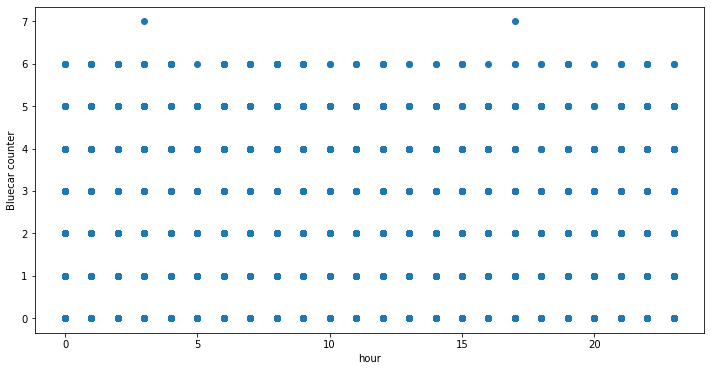

In [26]:
# We now have our final dataset which is only about Paris, month is April and year=2018
# Identify the most popular hour of the day for picking up a shared 
#electric car (Bluecar) in the city of Paris over the month of April 2018.

# Visualizing the relationship between Bluecar counter and hour
fig, cars = plt.subplots(figsize=(12,6))
cars.scatter(taxi_clean['hour'], taxi_clean['Bluecar counter'])
cars.set_xlabel('hour')
cars.set_ylabel('Bluecar counter')
plt.show()
# The plot does not show a clear relationship between the two variables

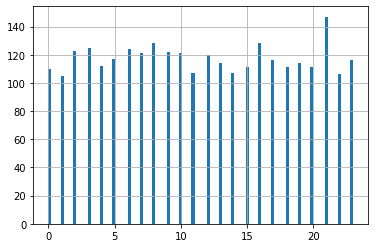

In [31]:
# Using hour variable to visualize the hour variable
taxi_clean.hour.hist(bins=100)

# From the graph below, we can see the most popular hour is 21:00 hrs.

In [36]:
# Tabulating rental status
taxi_clean['Cars'].value_counts()

0    1029
1     450
3     383
2     344
4     297
5     210
6     101
7       2
Name: Cars, dtype: int64

In [34]:
taxi_clean.columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City', 'ID',
       'Kind', 'Geo point', 'Postal code', 'Public name', 'Rental status',
       'Slots', 'Station type', 'Status', 'Subscription status', 'year',
       'month', 'day', 'hour', 'minute'],
      dtype='object')